# 2019 Insights on Learning to Code Python after 25

StackOverflow just released their annual survey and it goes over a lot of information in which nearly 90,000 developers told them how they learn and level up, which tools they’re using, and what they want. 

I will analyze data based on US-based individuals that have started to learn how to code Python after the age of 25 and go over factors such as career/job satisfaction and compensation. To download the dataset yourself go to: 
https://insights.stackoverflow.com/survey/2019

# Setting Up the Data

In [1]:
import pandas as pd
survey = pd.read_csv('survey_results_public.csv')
survey.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [50]:
#Add Python Column
survey['Python'] = survey["LanguageWorkedWith"].str.contains('Python')
survey.shape

(88883, 86)

In [3]:
#Identify the columns that will be the most helpful for our analysis
survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [4]:
interest = ['Country','Employment','Age1stCode','JobSat','UndergradMajor','CareerSat','JobSeek','Age','CompTotal','Python']

survey_strip = survey[interest]

In [5]:
survey_strip.isnull().sum()

Country             132
Employment         1702
Age1stCode         1249
JobSat            17895
UndergradMajor    13269
CareerSat         16036
JobSeek            8328
Age                9673
CompTotal         32938
Python             1314
dtype: int64

In [6]:
survey_strip.head()

,Country,Employment,Age1stCode,JobSat,UndergradMajor,CareerSat,JobSeek,Age,CompTotal,Python
0,United Kingdom,"Not employed, and not looking for work",10,NaN,NaN,NaN,NaN,14.0,NaN,True
1,Bosnia and Herzegovina,"Not employed, but looking for work",17,NaN,NaN,NaN,I am actively looking for a job,19.0,NaN,True
2,Thailand,Employed full-time,22,Slightly satisfied,Web development or web design,Slightly satisfied,"I’m not actively looking, but I am open to new...",28.0,23000.0,False
3,United States,Employed full-time,16,Slightly satisfied,"Computer science, computer engineering, or sof...",Very satisfied,I am not interested in new job opportunities,22.0,61000.0,True
4,Ukraine,Employed full-time,14,Slightly dissatisfied,"Computer science, computer engineering, or sof...",Very dissatisfied,I am not interested in new job opportunities,30.0,NaN,True


In [7]:
survey_strip = survey_strip.dropna(subset=['Age1stCode'])
survey_strip.isnull().sum()

Country               0
Employment         1521
Age1stCode            0
JobSat            17195
UndergradMajor    12709
CareerSat         15516
JobSeek            7976
Age                8761
CompTotal         31837
Python              997
dtype: int64

In [8]:
survey_strip.shape
#1249 rows were removed

(87634, 10)

Now we have some string values leftover in "Age1stCode" that we'll need to filter out in order for us to count this column as an integer. 

In [9]:
survey_strip["Age1stCode"].value_counts()

15                      8681
16                      8633
14                      8452
18                      7945
12                      7735
13                      6377
17                      5915
10                      5061
19                      4561
20                      3718
11                      3515
8                       2471
21                      1940
9                       1926
22                      1710
7                       1395
23                      1054
25                       914
24                       842
6                        828
5                        521
Younger than 5 years     520
26                       491
27                       417
30                       384
28                       346
29                       242
32                       139
35                       134
31                       130
                        ... 
42                        20
44                        18
43                        18
50            

In [10]:
#Filter out values of people that first coded < 5 years old and > 85 years old as that data may not be very accurate anyway
survey_filter_strip = survey_strip[survey_strip['Age1stCode'] != 'Older than 85']
survey_filter_strip = survey_filter_strip[survey_filter_strip['Age1stCode'] != 'Younger than 5 years']
survey_filter_strip['Age1stCode'] = survey_filter_strip['Age1stCode'].astype(int)
survey_filter_strip.shape

(87088, 10)

In [11]:
#Now let's set up a filter for people that are over the age of 25
survey_over_25 = survey_filter_strip[survey_filter_strip['Age1stCode'] >= 25]
survey_over_25.shape

(3808, 10)

We now have two tables to compare results: 
* Survey_over_25 
* Survey_filter_strip. 

Roughly 4.3% of respondents have started coding after 25 years of age

# Analyzing Job Satisfaction

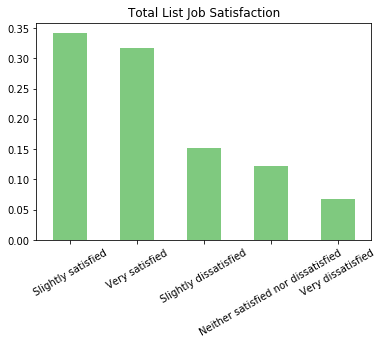

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
survey_filter_strip['JobSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Total List Job Satisfaction", colormap=plt.cm.Accent)
plt.show()

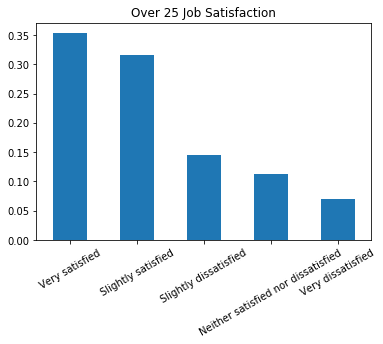

In [13]:
survey_over_25['JobSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Over 25 Job Satisfaction")

We can see that there aren't any notable differences when it comes to job satisfaction when comparing Over 25 first-time coders to the rest of the respondents.

# Analyzing Career Satisfaction

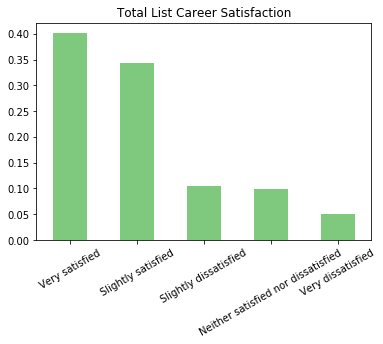

In [14]:
survey_filter_strip['CareerSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Total List Career Satisfaction", colormap=plt.cm.Accent)
plt.show()

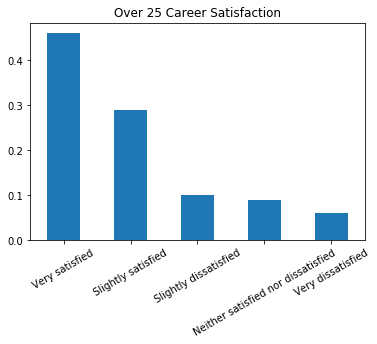

In [15]:
survey_over_25['CareerSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Over 25 Career Satisfaction")

In [16]:
survey_over_25['CareerSat'].value_counts(normalize=True)

Very satisfied                        0.460508
Slightly satisfied                    0.290197
Slightly dissatisfied                 0.101199
Neither satisfied nor dissatisfied    0.088858
Very dissatisfied                     0.059238
Name: CareerSat, dtype: float64

In [17]:
survey_filter_strip['CareerSat'].value_counts(normalize=True)

Very satisfied                        0.401491
Slightly satisfied                    0.344079
Slightly dissatisfied                 0.105071
Neither satisfied nor dissatisfied    0.098649
Very dissatisfied                     0.050711
Name: CareerSat, dtype: float64

There is a slight uptick in people that have coded after the age of 25 to be very satisfied with their careers. Next we'll want to look at their college education. 

# Education from People Over 25

In [18]:
survey_over_25['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          854
A business discipline (ex. accounting, finance, marketing)               374
A humanities discipline (ex. literature, history, philosophy)            313
Another engineering discipline (ex. civil, electrical, mechanical)       294
A social science (ex. anthropology, psychology, political science)       279
A natural science (ex. biology, chemistry, physics)                      265
Web development or web design                                            212
Information systems, information technology, or system administration    196
Fine arts or performing arts (ex. graphic design, music, studio art)     194
Mathematics or statistics                                                113
I never declared a major                                                  93
A health science (ex. nursing, pharmacy, radiology)                       75
Name: UndergradMajor, dtype: int64

In [19]:
survey_filter_strip['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          46609
Another engineering discipline (ex. civil, electrical, mechanical)        6144
Information systems, information technology, or system administration     5170
Web development or web design                                             3358
A natural science (ex. biology, chemistry, physics)                       3192
Mathematics or statistics                                                 2918
A business discipline (ex. accounting, finance, marketing)                1811
A humanities discipline (ex. literature, history, philosophy)             1552
A social science (ex. anthropology, psychology, political science)        1328
Fine arts or performing arts (ex. graphic design, music, studio art)      1207
I never declared a major                                                   939
A health science (ex. nursing, pharmacy, radiology)                        318
Name: UndergradMajor, dtype: int64

In [20]:
s_over_25_non_cs = survey_over_25[survey_over_25['UndergradMajor'] != 'Computer science, computer engineering, or software engineering']
s_over_25_us_non_cs = survey_over_25[survey_over_25['Country'] == 'United States']
s_over_25_us_non_cs.shape

(1302, 10)

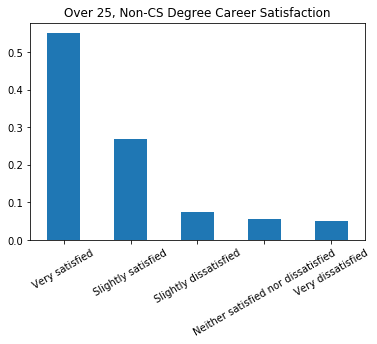

In [21]:
s_over_25_us_non_cs['CareerSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Over 25, Non-CS Degree Career Satisfaction")

In [22]:
s_over_25_us_non_cs['CareerSat'].value_counts(normalize=True)

Very satisfied                        0.550476
Slightly satisfied                    0.267619
Slightly dissatisfied                 0.075238
Neither satisfied nor dissatisfied    0.056190
Very dissatisfied                     0.050476
Name: CareerSat, dtype: float64

Now when we go deeper into the results, we see a 55% 'very satisfied' rate for people that are:
* From the United States
* Written their first code after the age of 25
* With an undergrad that was not in CS

# Python Learners

In [23]:
#Remember that we have survey_filter_strip and survey_over_25
survey_filter_strip['Python'].value_counts(normalize=True)

False    0.583488
True     0.416512
Name: Python, dtype: float64

In [24]:
survey_over_25['Python'].value_counts(normalize=True)

False    0.681991
True     0.318009
Name: Python, dtype: float64

In [33]:
survey_over_25_us = survey_over_25[survey_over_25['Country'] == 'United States']
survey_filter_strip_us = survey_filter_strip[survey_filter_strip['Country'] == 'United States']

In [34]:
python_over_25 = survey_over_25_us[survey_over_25_us['Python'] == True]
non_python_over_25 = survey_over_25_us[survey_over_25_us['Python'] == False]
python_general = survey_filter_strip_us[survey_filter_strip_us['Python'] == True]
non_python_general = survey_filter_strip_us[survey_filter_strip_us['Python'] == False]

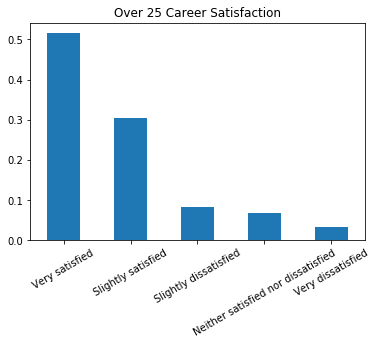

In [38]:
python_general['CareerSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Over 25 Career Satisfaction")

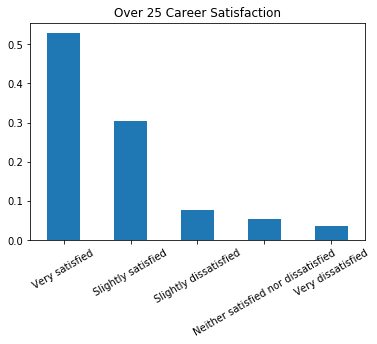

In [37]:
non_python_general['CareerSat'].value_counts(normalize=True).plot(kind="bar", rot=30, title = "Over 25 Career Satisfaction")

Throughout the different combinations, there wasn't any discernable difference between learning Python and not learning Python.

# Knowing Python Compensation

In [39]:
survey_over_25_us = survey_over_25_us[survey_over_25_us['CompTotal'] < 3000000]
survey_filter_strip_us = survey_filter_strip_us[survey_filter_strip_us['CompTotal'] < 3000000]

In [40]:
python_over_25 = survey_over_25_us[survey_over_25_us['Python'] == True]
non_python_over_25 = survey_over_25_us[survey_over_25_us['Python'] == False]
python_general = survey_filter_strip_us[survey_filter_strip_us['Python'] == True]
non_python_general = survey_filter_strip_us[survey_filter_strip_us['Python'] == False]

In [42]:
print(python_over_25['CompTotal'].mean())
print(non_python_over_25['CompTotal'].mean())
print(python_general['CompTotal'].mean())
print(non_python_general['CompTotal'].mean())

97423.80065359476
86453.67850467289
118447.82689785807
110744.0958218664


In general, it's much more profitable with knowing Python as opposed to not knowing Python.

# Employment Status of People Learning Python after Age of 25

In [43]:
python_over_25.shape

(306, 10)

In [48]:
python_over_25['Employment'].value_counts(normalize=True)

Employed full-time                                      0.927869
Independent contractor, freelancer, or self-employed    0.062295
Employed part-time                                      0.009836
Name: Employment, dtype: float64

In [49]:
survey['Employment'].value_counts(normalize=True)

Employed full-time                                      0.739152
Independent contractor, freelancer, or self-employed    0.097624
Not employed, but looking for work                      0.064234
Employed part-time                                      0.051261
Not employed, and not looking for work                  0.043622
Retired                                                 0.004106
Name: Employment, dtype: float64

Although not nearly close to statistical significance of the 306 individuals in the United States that learned Python after the age of 25 without a CS-related degree were employed. 